## **Predict whether a patient has diabetes or not.**

## Load the data

### Subtask:
Load the `diabetes.csv` dataset into a pandas DataFrame.

**Reasoning**:
Load the `diabetes.csv` file into a pandas DataFrame to begin the logistic regression analysis.

In [67]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows to verify loading
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

### Subtask:
Prepare the data for logistic regression by handling missing values, and separating features (X) and the target variable (y).

**Reasoning**:
Handle missing values in the dataset and separate the features and the target variable for the logistic regression model.

In [68]:
import numpy as np

# Replace 0 values with NaN in columns where 0 is not biologically plausible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Impute missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Display the first few rows of the preprocessed data
display(X.head())
display(y.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


,Outcome
0,1
1,0
2,1
3,0
4,1


## Split the data

### Subtask:
Split the preprocessed data into training and testing sets.

**Reasoning**:
Split the features (X) and target variable (y) into training and testing sets to train and evaluate the logistic regression model.

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


## Train the model

### Subtask:
Train a logistic regression model on the training data.

**Reasoning**:
Train a logistic regression model on the training data using the `X_train` and `y_train` variables.

In [70]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object, increasing the max_iter for better convergence
model = LogisticRegression(max_iter=1000)  # Increased iterations

# Fit the logistic regression model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained logistic regression model on the testing data.

**Reasoning**:
Evaluate the trained logistic regression model using metrics like accuracy, precision, recall, and F1-score on the test data (`X_test` and `y_test`).

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1-score: 0.6415094339622641


## Visualize Confusion Matrix

### Subtask:
Visualize the confusion matrix of the model's predictions.

**Reasoning**:
Visualize the confusion matrix to understand the model's performance in terms of true positives, true negatives, false positives, and false negatives.

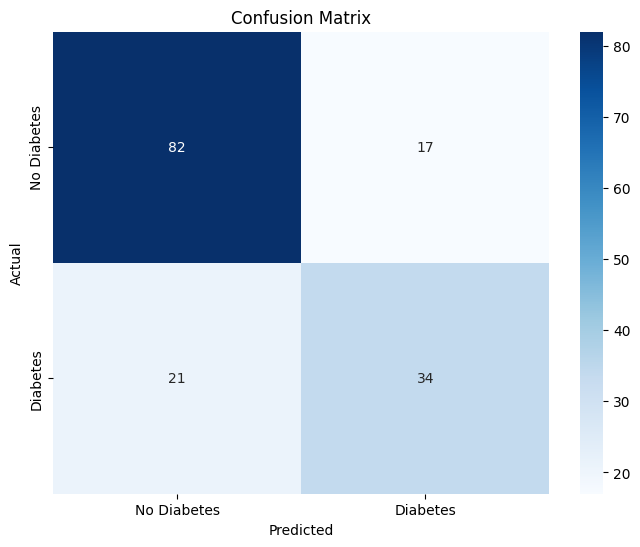

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()